<a href="https://colab.research.google.com/github/Razaqa-Aliskar/Cancer-Mortality-Prediction/blob/main/Mortality%20Status%20Classification%20Modelling%20%26%20Hyperparameters%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook 2: Mortality Status Classification Modelling & Hyperparameters Tuning** ##   

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv('Cancer_Mortality_Status_Dataset.csv')
df

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,40,0,0,0,1,3,1,4,1,1,24,1,0
1,21,1,1,2,0,2,1,36,1,1,13,5,0
2,30,2,2,4,0,2,1,64,1,1,13,7,0
3,30,0,0,0,1,3,1,18,1,1,1,1,0
4,18,1,0,1,1,3,1,42,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,34,0,0,0,0,2,1,9,1,1,0,1,0
4017,28,1,1,2,0,2,1,47,1,1,13,8,0
4018,40,1,0,1,0,2,1,22,1,0,10,3,0
4019,30,1,0,1,0,2,1,45,1,1,10,1,0


In [6]:
x = df[['Age',	'T_Stage',	'N_Stage',	'6th_Stage',	'Differentiated',	'Grade',	'A_Stage',	'Tumor_Size',	'Estrogen_Status',	'Progesterone_Status',	'Regional_Node_Examined',	'Regional_Node_Positive']]
y = df['Mortality_Status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.25)

In [8]:
print("Training labels distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting labels distribution:")
print(y_test.value_counts(normalize=True))

Training labels distribution:
Mortality_Status
0    0.844776
1    0.155224
Name: proportion, dtype: float64

Testing labels distribution:
Mortality_Status
0    0.853877
1    0.146123
Name: proportion, dtype: float64


In [10]:
feature_cols = ['Age', 'T_Stage','N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']  # Remove the extra brackets
X = df[feature_cols] # Features
y = df['Mortality_Status']

# KNN Model

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4021.0,25.478737,9.382813,1.0,18.0,25.0,33.0,42.0
T_Stage,4021.0,0.785128,0.765609,0.0,0.0,1.0,1.0,3.0
N_Stage,4021.0,0.437702,0.692828,0.0,0.0,0.0,1.0,2.0
6th_Stage,4021.0,1.320816,1.265515,0.0,0.0,1.0,2.0,4.0
Differentiated,4021.0,0.690127,1.016028,0.0,0.0,0.0,1.0,3.0
Grade,4021.0,2.150957,0.638205,1.0,2.0,2.0,3.0,4.0
A_Stage,4021.0,0.977369,0.148743,0.0,1.0,1.0,1.0,1.0
Tumor_Size,4021.0,30.536931,20.563430,0.0,16.0,25.0,39.0,111.0
Estrogen_Status,4021.0,0.933101,0.249878,0.0,1.0,1.0,1.0,1.0
Progesterone_Status,4021.0,0.826660,0.378588,0.0,1.0,1.0,1.0,1.0


In [12]:
# To expand e scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4021.00,25.48,9.38,1.00,18.00,25.00,33.00,42.00
T_Stage,4021.00,0.79,0.77,0.00,0.00,1.00,1.00,3.00
N_Stage,4021.00,0.44,0.69,0.00,0.00,0.00,1.00,2.00
6th_Stage,4021.00,1.32,1.27,0.00,0.00,1.00,2.00,4.00
Differentiated,4021.00,0.69,1.02,0.00,0.00,0.00,1.00,3.00
Grade,4021.00,2.15,0.64,1.00,2.00,2.00,3.00,4.00
A_Stage,4021.00,0.98,0.15,0.00,1.00,1.00,1.00,1.00
Tumor_Size,4021.00,30.54,20.56,0.00,16.00,25.00,39.00,111.00
Estrogen_Status,4021.00,0.93,0.25,0.00,1.00,1.00,1.00,1.00
Progesterone_Status,4021.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00


In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df.to_csv('knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
3273,0,0
1204,0,0
2720,0,0
1954,0,0
1226,0,0
...,...,...
2696,0,0
2176,0,0
596,0,0
3061,0,0


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       859
           1       0.26      0.05      0.08       147

    accuracy                           0.84      1006
   macro avg       0.56      0.51      0.50      1006
weighted avg       0.77      0.84      0.79      1006



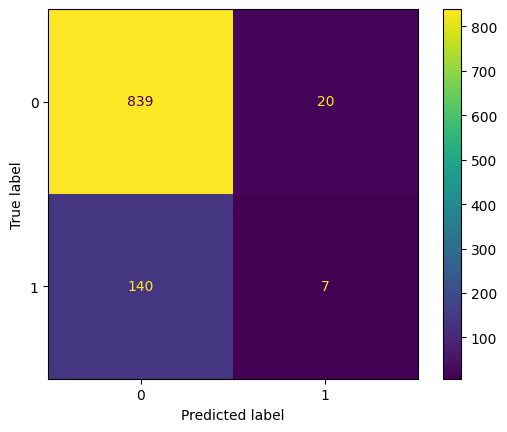

In [17]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

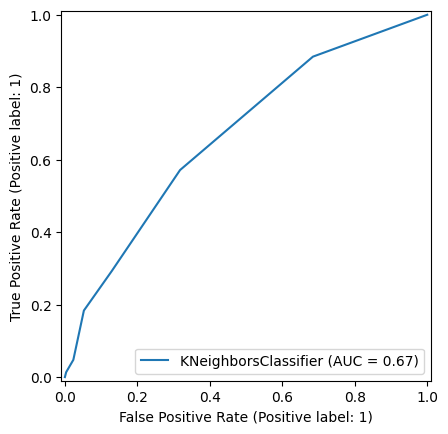

In [18]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

**Testing with a different K-value**

Text(0, 0.5, 'Mean Error')

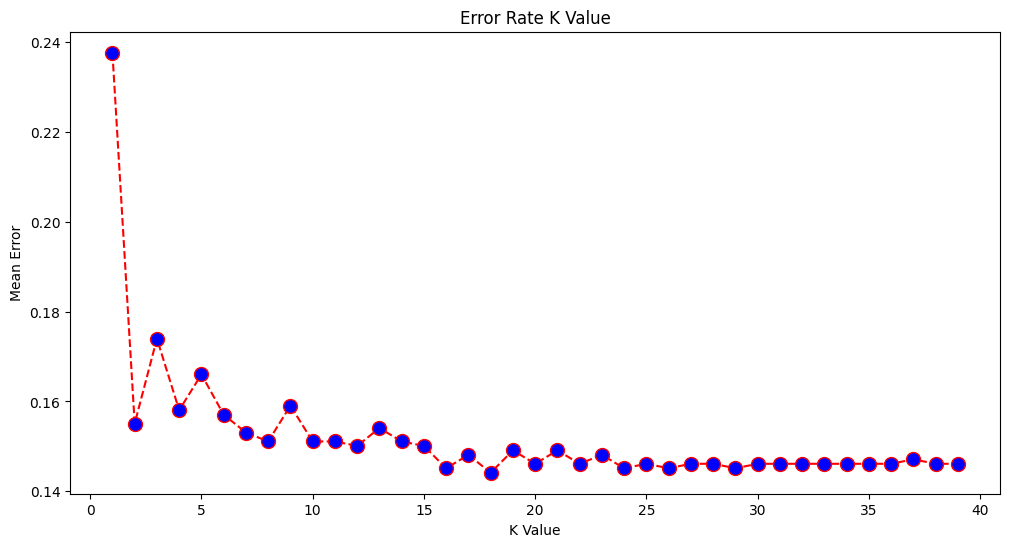

In [19]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [71]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 39)
# Fit the classifier to the data
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [68]:
#Perform predictions on the test data
y_pred1=knn1.predict(X_test)

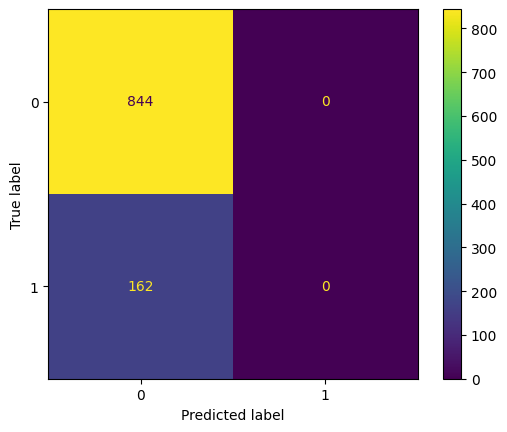

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()


In [70]:
#classification report for the k-value calculated as 39
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       844
           1       0.00      0.00      0.00       162

    accuracy                           0.84      1006
   macro avg       0.42      0.50      0.46      1006
weighted avg       0.70      0.84      0.77      1006



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The accuracy was lower when testing with a different K-value

# Naive Bayes Model

In [24]:
# Perform Minimum - Maximum Normalization:
X1 = (X - np.min(X)) / (np.max(X) - np.min(X))

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       859
           1       0.33      0.41      0.37       147

    accuracy                           0.79      1006
   macro avg       0.61      0.63      0.62      1006
weighted avg       0.81      0.79      0.80      1006



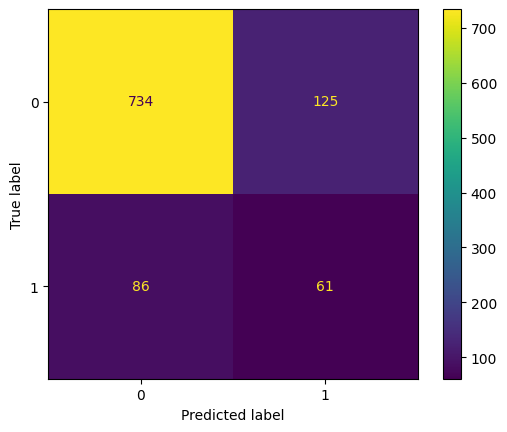

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

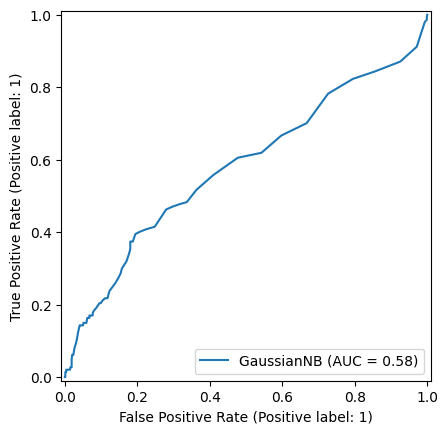

In [29]:
from sklearn.metrics import RocCurveDisplay
nb_roc = RocCurveDisplay.from_estimator(nb, X1_test, y_test)

# Logistic Regression Model

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [35]:
# split X and y into training and testing sets
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)
print('Whole Data shape', df.shape)
print('X1_train shape', X1_train.shape)
print('X1_test shape', X1_test.shape)

Whole Data shape (4021, 13)
X1_train shape (3015, 12)
X1_test shape (1006, 12)


In [36]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)
y_pred=logreg.predict(X1_test)

In [37]:
#To see the predicted values
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
Comparison_df = pd.DataFrame({'Actual Mortality Status' : y_test,
'Predicted' : y_pred})
Comparison_df.to_csv('Status_Comparison_df.csv', index=False)

In [39]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
pd

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

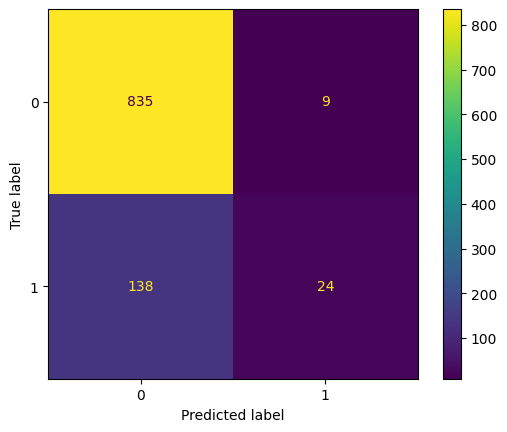

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

In [41]:
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.8538767395626242


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       844
           1       0.73      0.15      0.25       162

    accuracy                           0.85      1006
   macro avg       0.79      0.57      0.58      1006
weighted avg       0.84      0.85      0.81      1006



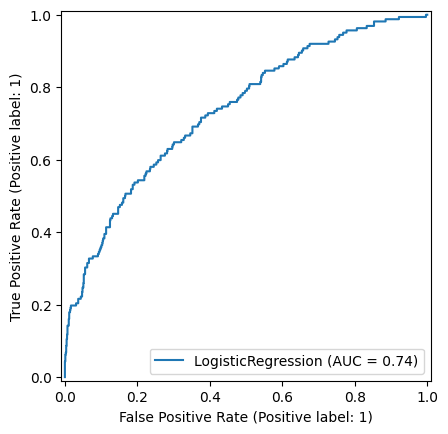

In [43]:
# Create a new variable for the RocCurveDisplay object
roc_display = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)

# Hyperparameter Tuning For the Best Model (Logistic Regression Model)

In [72]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000],
    'class_weight': ['balanced']
}

In [79]:
# Set up GridSearch
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X1_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [1000],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [80]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}


In [81]:
# Best model
best_logreg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_logreg.predict(X1_test)

In [82]:
print(grid_search.best_params_)

{'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       844
           1       0.29      0.63      0.40       162

    accuracy                           0.69      1006
   macro avg       0.60      0.67      0.59      1006
weighted avg       0.81      0.69      0.73      1006



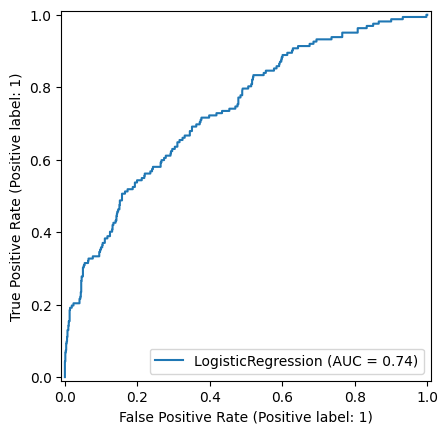

In [84]:
roc_display1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X1_test, y_test)

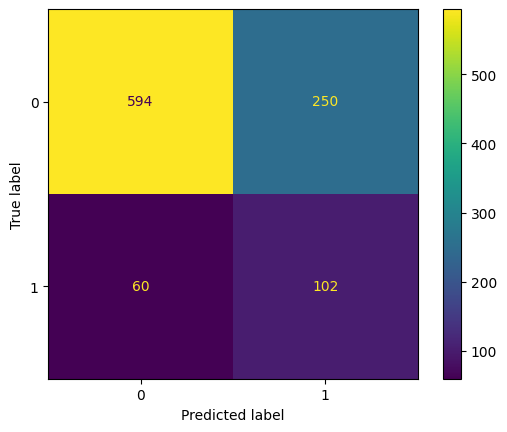

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()